# Using NN to study the Ising model phase transition

Notebook based on the paper:

**Machine learning phases of matter.** ([Link](http://arxiv.org/abs/1605.01735%0Ahttp://dx.doi.org/10.1038/nphys4035))

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle,os
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from keras import optimizers
import sys, os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

Using TensorFlow backend.


In [2]:
plt.rcParams['figure.figsize'] = [6.32, 5.11]
plt.rcParams['figure.constrained_layout.use'] = True

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.labelpad'] = 15

plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3

plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3

plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.markerscale'] = 1

plt.rcParams['lines.markersize'] = 9
plt.rcParams['lines.linewidth'] = 2

In [3]:
L = 40
samples_number = 10000
temperatures = np.arange(0.25, 4.01, 0.25)
dataset_size = 150000

In [4]:
data = pickle.load(open('Ising2DFM_reSample_L40_T=All.pkl','rb'))
X = np.unpackbits(data).astype(int).reshape(-1, L * L)
del data

In [5]:
temp_val = np.hstack([np.repeat(temp, samples_number) for temp in temperatures])
train_idx = np.random.choice(X.shape[0], size=dataset_size, replace=False)

In [6]:
aux = np.arange(X.shape[0])
test_idx = np.asarray(list(set(aux).difference(set(train_idx))))

In [7]:
Y = np.zeros(temp_val.shape)
Y = np.where(temp_val < 2.2691, 1, Y)

In [8]:
x_train = X[train_idx]
y_label = Y[train_idx]
x_test = X[test_idx]
y_test = Y[test_idx]
del Y, X

In [9]:
model = Sequential()
model.add(Dense(100, input_shape=(L * L, ), activation='sigmoid', kernel_regularizer=regularizers.l2(0.1)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [10]:
# A rede não consegue treinar se os valores do modelo de Ising forem +-1, provavelmente é necessário 
# fazer algum preprocessamento nos dados.
#x_train = np.where(x_train==0, -1, x_train)
#model = Sequential()
#model.add(Dense(100, input_shape=(L * L, ), activation='sigmoid'))#, kernel_regularizer=regularizers.l2(0.01)))
#model.add(Dropout(0.5))
#model.add(Dense(60, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               160100    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 160,201
Trainable params: 160,201
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(x_train, y_label, validation_split=0.1, batch_size=64,
                    workers=8, use_multiprocessing=True, epochs=100)


Train on 135000 samples, validate on 15000 samples
Epoch 1/100
135000/135000 [==============================] - 5s 36us/step - loss: 0.6246 - accuracy: 0.8685 - val_loss: 0.2822 - val_accuracy: 0.9913
Epoch 2/100
135000/135000 [==============================] - 5s 34us/step - loss: 0.3282 - accuracy: 0.9510 - val_loss: 0.2303 - val_accuracy: 0.9941
Epoch 3/100
135000/135000 [==============================] - 5s 33us/step - loss: 0.2907 - accuracy: 0.9602 - val_loss: 0.2067 - val_accuracy: 0.9921
Epoch 4/100
135000/135000 [==============================] - 5s 34us/step - loss: 0.2713 - accuracy: 0.9652 - val_loss: 0.2154 - val_accuracy: 0.9845
Epoch 5/100
135000/135000 [==============================] - 5s 34us/step - loss: 0.2552 - accuracy: 0.9691 - val_loss: 0.1939 - val_accuracy: 0.9937
Epoch 6/100
135000/135000 [==============================] - 5s 34us/step - loss: 0.2501 - accuracy: 0.9698 - val_loss: 0.2060 - val_accuracy: 0.9827
Epoch 7/100
135000/135000 [=====================

135000/135000 [==============================] - 5s 34us/step - loss: 0.1865 - accuracy: 0.9713 - val_loss: 0.1101 - val_accuracy: 0.9920
Epoch 54/100
135000/135000 [==============================] - 5s 34us/step - loss: 0.1966 - accuracy: 0.9676 - val_loss: 0.1349 - val_accuracy: 0.9931
Epoch 55/100
135000/135000 [==============================] - 5s 34us/step - loss: 0.1991 - accuracy: 0.9656 - val_loss: 0.1144 - val_accuracy: 0.9922
Epoch 56/100
135000/135000 [==============================] - 5s 34us/step - loss: 0.2001 - accuracy: 0.9655 - val_loss: 0.1167 - val_accuracy: 0.9934
Epoch 57/100
135000/135000 [==============================] - 5s 34us/step - loss: 0.1908 - accuracy: 0.9698 - val_loss: 0.1124 - val_accuracy: 0.9918
Epoch 58/100
135000/135000 [==============================] - 5s 34us/step - loss: 0.1854 - accuracy: 0.9717 - val_loss: 0.1177 - val_accuracy: 0.9927
Epoch 59/100
135000/135000 [==============================] - 5s 34us/step - loss: 0.1814 - accuracy: 0.972

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)

In [15]:
print('Test accuracy: {1:6.4f} \nTest loss: {0:6.4f}'.format(score[0], score[1]))

Test accuracy: 0.9936 
Test loss: 0.1258


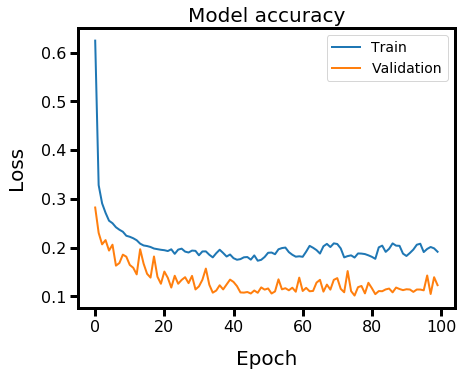

In [16]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

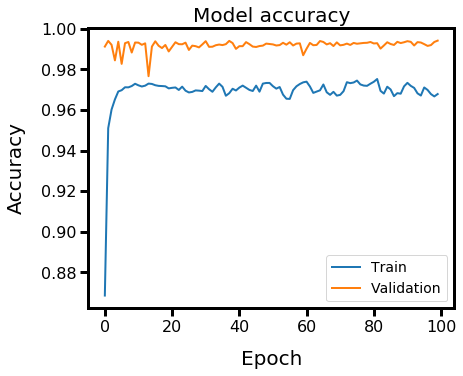

In [17]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [18]:
res = model.predict(x_test)

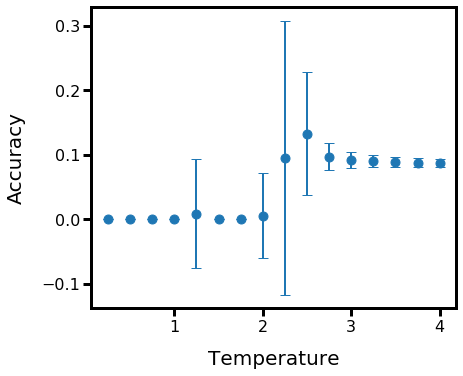

In [19]:
acc = np.zeros(np.unique(temp_val).shape[0])
acc_std = np.zeros(np.unique(temp_val).shape[0])

for idx, temp in enumerate(np.unique(temp_val)):

    pos = np.argwhere(temp_val[test_idx] == temp)
    
    acc[idx] = np.mean(np.abs(res[pos] - y_test[pos]))
    acc_std[idx] = np.std(np.abs(res[pos] - y_test[pos]))

plt.errorbar(x=np.unique(temp_val), y=acc,
             yerr=acc_std, fmt='o', capsize=5)

plt.xlabel('Temperature')
plt.ylabel('Accuracy')
plt.show()

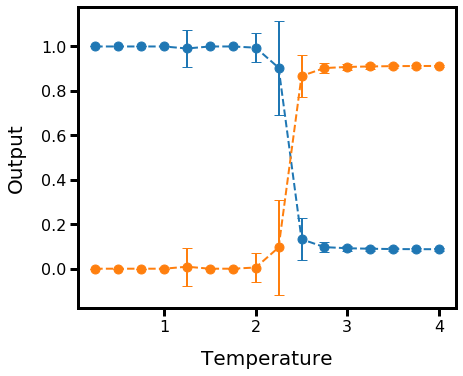

In [20]:
#%matplotlib notebook

output_mean = np.zeros(np.unique(temp_val).shape[0])
output_std = np.zeros(np.unique(temp_val).shape[0])

for idx, temp in enumerate(np.unique(temp_val)):

    pos = np.argwhere(temp_val[test_idx] == temp)
    
    output_mean[idx] = np.mean(res[pos])
    output_std[idx] = np.std(res[pos])

plt.errorbar(x=np.unique(temp_val), y=output_mean, yerr=output_std,
             fmt='o', capsize=5, linestyle='--')
plt.errorbar(x=np.unique(temp_val), y=np.abs(output_mean - 1),
             yerr=output_std, fmt='o', capsize=5, linestyle='--')


plt.ylabel('Output')
plt.xlabel('Temperature')
plt.show()